In [1]:
%matplotlib inline

from simulation.community import Community, VoteConstraints
from simulation.student import Student
from simulation.artifact import Quality
from reputation.indegree_positive import InDegreePositive
from reputation.indegree import InDegree
from reputation.eigentrust import EigenTrust
from reputation.pagerank import PageRank
from output.chart import chart
from output.metrics import getMetrics

# Activity Test


In this test, it is investigated whether equally competent and productive students are ranked higher when they contribute more actively, i.e. vote and post more than their less active peers. It is expected that more avid contributors will be ranked higher by a reputation algorithm.

In [2]:
testName = "Activity"
community = Community()

### Actions

TODO

In [3]:
postGoodArtefact = community.createPostAction(Quality.GOOD)
postBadArtefact = community.createPostAction(Quality.BAD)
voteBadNegative = community.createVoteAction(Quality.BAD, VoteConstraints.BADART)
voteAnyNegative = community.createVoteAction(Quality.BAD, VoteConstraints.NONE)
voteGoodPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.GOODART)
voteAnyPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.NONE)
idle = community.createIdleAction()

### Student Archetypes

The first group of archetypes are students that expose low activity. ...

In [4]:
lowActivityStudent = Student("low",
    [
        (0.028, postGoodArtefact),
        (0.012, postBadArtefact),
        (0.056, voteBadNegative),
        (0.024, voteAnyNegative),
        (0.056, voteGoodPositive),
        (0.024, voteAnyPositive),
        (0.8, idle)
    ])
community.addStudents(lowActivityStudent, 10)

Students of mediocre activity are students that ...

In [5]:
medActivityStudent = Student("med",
    [
        (0.07, postGoodArtefact),
        (0.03, postBadArtefact),
        (0.14, voteBadNegative),
        (0.06, voteAnyNegative),
        (0.14, voteGoodPositive),
        (0.06, voteAnyPositive),
        (0.5, idle)
    ])
community.addStudents(medActivityStudent, 10)

Highly active behavior is considered as ...

In [6]:
highActivityStudent = Student("high",
    [
        (0.14, postGoodArtefact),
        (0.06, postBadArtefact),
        (0.28, voteBadNegative),
        (0.12, voteAnyNegative),
        (0.28, voteGoodPositive),
        (0.12, voteAnyPositive),
    ])
community.addStudents(highActivityStudent, 10)

## Synthesis

Reputation scores are based on 100 actions by the 30 students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%

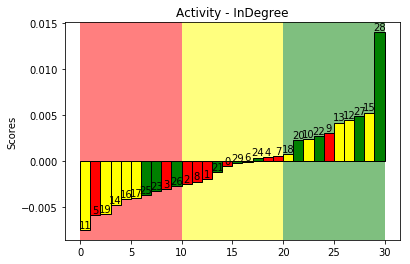

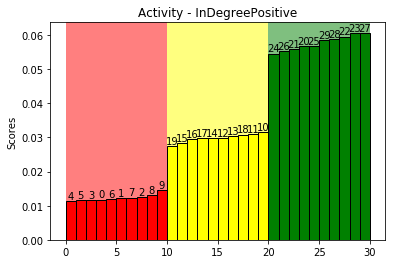

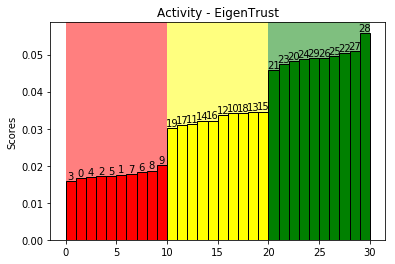

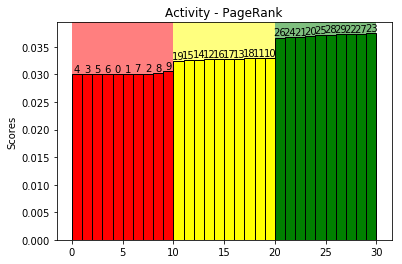

In [10]:
groups = ('low', 'med', 'high')
colors = {'low': 'r', 'med': 'yellow', 'high': 'g'}
results = community.run([InDegree(), InDegreePositive(), EigenTrust(), PageRank()], 100, 100)
for (name, result) in results:
    c = chart(result, groups, colors, testName + " - " + name)
    distinction, correctness, inversionQ = getMetrics(result, groups)